# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import os
import pickle

# TODO: Fill this in based on where you saved the training and testing data

#print (os.getcwd())


training_file = ".\\traffic-signs-data\\train.p"
testing_file = ".\\traffic-signs-data\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print ("Done")


Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import random


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [len(X_train[0]),len(X_train[0][0])]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

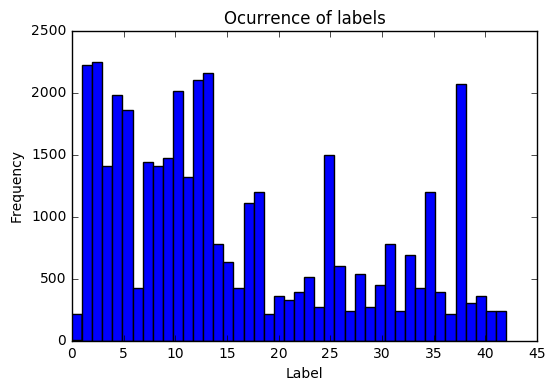

Distribution is as follows
[Label],[count]
210 	 Speed limit (20km/h)
2220 	 Speed limit (30km/h)
2250 	 Speed limit (50km/h)
1410 	 Speed limit (60km/h)
1980 	 Speed limit (70km/h)
1860 	 Speed limit (80km/h)
420 	 End of speed limit (80km/h)
1440 	 Speed limit (100km/h)
1410 	 Speed limit (120km/h)
1470 	 No passing
2010 	 No passing for vehicles over 3.5 metric tons
1320 	 Right-of-way at the next intersection
2100 	 Priority road
2160 	 Yield
780 	 Stop
630 	 No vehicles
420 	 Vehicles over 3.5 metric tons prohibited
1110 	 No entry
1200 	 General caution
210 	 Dangerous curve to the left
360 	 Dangerous curve to the right
330 	 Double curve
390 	 Bumpy road
510 	 Slippery road
270 	 Road narrows on the right
1500 	 Road work
600 	 Traffic signals
240 	 Pedestrians
540 	 Children crossing
270 	 Bicycles crossing
450 	 Beware of ice/snow
780 	 Wild animals crossing
240 	 End of all speed and passing limits
689 	 Turn right ahead
420 	 Turn left ahead
1200 	 Ahead only
390 	 Go strai

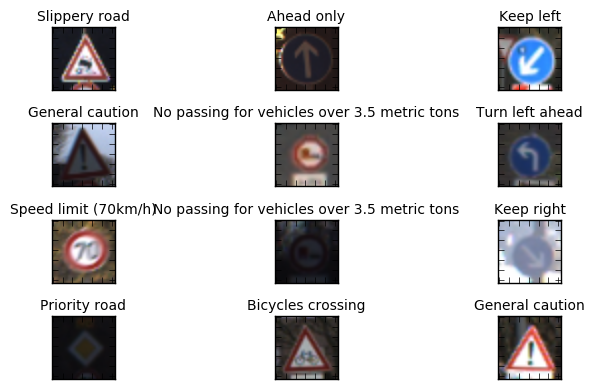

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import csv

#Plot histogram of train data
label=list(range(43))

plt.hist(train['labels'], bins=43)
plt.title("Ocurrence of labels")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()
# Visualizations will be shown in the notebook.
%matplotlib inline

def read_label_names(filename):
    with open(filename, newline='', encoding="utf8") as csvfile:
        spamreader = csv.reader(csvfile)
        vals = [x[1] for x in spamreader][1:]
        return vals

label_names = read_label_names('signnames.csv')
histogram=np.histogram(y_train, bins=list(range(44)))

print ("Distribution is as follows")
print ("[Label],[count]")
for i in range(len(histogram[0])):
    print ("%d \t %s" % (histogram[0][i], label_names[histogram[1][i]]) )
#Histogram[0] contains number of ocurrences

def show_samples(n_samples, images, labels, randomize = False):
    # Show a random sign with its label
    for sample_n in range(n_samples):
        if randomize:
            n = random.randint(0, len(images))
        else:
            n = sample_n
        ax = plt.subplot(np.ceil(n_samples/3),3,sample_n+1)
        ax.set_title(label_names[labels[n]], fontsize=10)
        ax.imshow(images[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()

    #pick 12 random images for test
dummy_images=[]
dummy_labels=[]
for i in range(12):
    index=np.random.randint(0,len(X_train))
    dummy_images.append(X_train[index])
    dummy_labels.append(y_train[index])

show_samples(12, dummy_images, dummy_labels, randomize = False)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import tensorflow as tf



def preprocess(img):
    img-=0.5*np.max(img)
    return img


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**

Substracted half the maximum value of the image from it, tried to normalize it, however,
it seems like dividing the data doesn´t plot correclty, so the data is in range [-127.5, 127.5] at most.
Tried a small set with this processing with good results, so, no more changes were made.
Another idea was to substract half the maximum value channel wise, however, this didn´t seem to improve learning.

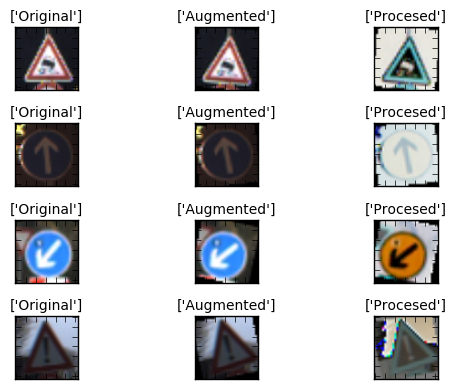

Augmenting samples
Current count for class 0: 210
   Augmenting class 0 4 times
Current count for class 1: 2220
Current count for class 2: 2250
Current count for class 3: 1410
Current count for class 4: 1980
Current count for class 5: 1860
Current count for class 6: 420
   Augmenting class 6 2 times
Current count for class 7: 1440
Current count for class 8: 1410
Current count for class 9: 1470
Current count for class 10: 2010
Current count for class 11: 1320
Current count for class 12: 2100
Current count for class 13: 2160
Current count for class 14: 780
Current count for class 15: 630
Current count for class 16: 420
   Augmenting class 16 2 times
Current count for class 17: 1110
Current count for class 18: 1200
Current count for class 19: 210
   Augmenting class 19 4 times
Current count for class 20: 360
   Augmenting class 20 2 times
Current count for class 21: 330
   Augmenting class 21 3 times
Current count for class 22: 390
   Augmenting class 22 2 times
Current count for class 23

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import scipy.ndimage.interpolation as ndimage

def rotate(image):
    tol=15
    image=ndimage.rotate(image, random.randrange(-tol,tol), reshape= False)
    return image

def translate(image):
    tol=2
    image=ndimage.shift(image, [random.randrange(-tol,tol),random.randrange(-tol,tol), 0])
    return image

def augment(image):
    image=translate(image)
    image=rotate(image)
    return image

def show_augmented(n_samples,images, labels):
    # Show processing steps
    for sample_n in range(n_samples):
        n = sample_n
        ax = plt.subplot(np.ceil(n_samples/3),3,sample_n+1)
        ax.set_title([labels[n]], fontsize=10)
        ax.imshow(images[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()

#print("Augmented")
augmented= np.array([augment(im) for im in dummy_images])
#show_samples(12, augmented, dummy_labels, randomize = False)
#print("Processed")
processed= np.array([preprocess(image) for image in augmented])
#show_samples(12, processed, dummy_labels, randomize = False)


comparission=[]
comparission_labels=[]
for i in range(len(dummy_images)):
    comparission.append(dummy_images[i])
    comparission.append(augmented[i])
    comparission.append(processed[i])
    
    comparission_labels.append("Original")
    comparission_labels.append("Augmented")
    comparission_labels.append("Procesed")

show_augmented(12, comparission, comparission_labels)

#Minimum 1500 training_examples per label
min_samples=1000
augmented_features=[]
augmented_labels=[]

print("Augmenting samples")
for class_index in range(len(histogram[0])):
    current_count=histogram[0][class_index]
    print ("Current count for class {}: {}".format(class_index, current_count))
    augment_times=int(min_samples/histogram[0][class_index])
    if augment_times > 1:
        print("   Augmenting class {} {} times".format(class_index,augment_times))
        for test_feature, test_label in zip(X_train, y_train):
            if class_index == test_label:
                for n in range(augment_times):
                    augmented_features.append(augment(test_feature))
                    augmented_labels.append(class_index)
print("Augmenting Done!")


"""
## Show some augemnted images
new_dummy_images=[]
new_dummy_labels=[]
for i in range(20):
    index=np.random.randint(0,len(augmented_features))
    new_dummy_images.append(augmented_features[index])
    new_dummy_labels.append(augmented_labels[index])
show_samples(12, new_dummy_images, new_dummy_labels, randomize=False)
"""
"""
plt.hist(augmented_labels, bins=43)
plt.title("Augmented Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

"""
X_train = np.array([preprocess(im) for im in X_train ])
X_test = np.array([preprocess(data) for data in X_test])


Merged data size= 55499
32


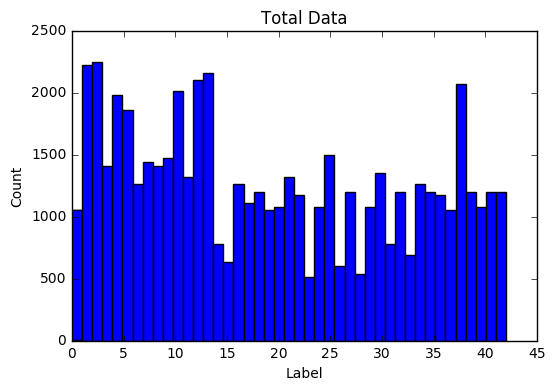

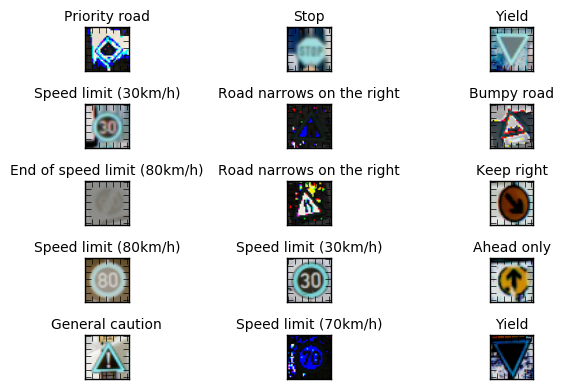

In [6]:


y_train=np.append(np.array(y_train),np.array(augmented_labels), axis=0)
del augmented_labels
augmented_features = np.array([preprocess(im) for im in augmented_features ])
X_train=np.append(np.array(X_train),np.array(augmented_features), axis=0)
del augmented_features

print("Merged data size= {}".format(len(X_train)))
print(len(X_train[0][0]))

plt.hist(y_train, bins=43)
plt.title("Total Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

show_samples(15, X_train, y_train, randomize=True)


In [7]:
### Shufling data

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
X_train, y_train = shuffle(X_train, y_train)
print ("Shuffling Done")
print ("X_train size: {}".format(X_train.shape))
print ("X_validation size: {}".format(X_validation.shape))
print ("X_test size: {}".format(X_test.shape))

Shuffling Done
X_train size: (44399, 32, 32, 3)
X_validation size: (11100, 32, 32, 3)
X_test size: (12630, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

For the training: split the pickled samples, augment them if are fewer than
1000, split them as 80% training set and 20% Validation 

As for augmenting, the augmented data was created by rotating the image
a random value in the range of +/-15° and shifting the image +/- 2 pixels
on both axis, thus adding variants on rotation an center of mass for signs.
However this was only done for classes with low occurences, as a way to have
a more equal size of samples per label

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [9]:
#Useful simplification

def conv2d(x, W, b, strides=1):
    #F_W=[f_height,f_width,input_depht,output_depht]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)

    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides=[1,k,k,1], padding='SAME')

def one_hot_y(y, labels):
    #Implements One hot encoding, as by Jan 22, tf.one_hot doesn´t work on windows
    #https://github.com/tensorflow/tensorflow/issues/6509
    num_labels = labels
    sparse_labels = tf.reshape(y, [-1, 1])
    derived_size = tf.shape(sparse_labels)[0]
    indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
    concated = tf.concat(1, [indices, sparse_labels])
    outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
    return tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

weights= {
'wc1': tf.Variable(tf.truncated_normal([3,3,3,32], mean = 0, stddev = 0.01)),
'wc2': tf.Variable(tf.truncated_normal([4,4,32,64], mean = 0, stddev = 0.01)),
'wfc1': tf.Variable(tf.truncated_normal([7*7*64,256], mean = 0, stddev = 0.01)),
'wfc2': tf.Variable(tf.truncated_normal([256,64], mean = 0, stddev = 0.01)),
'wfc3': tf.Variable(tf.truncated_normal([64,n_classes], mean = 0, stddev = 0.01))
}

biases= {
'bc1': tf.Variable(tf.zeros(32)),
'bc2': tf.Variable(tf.zeros(64)),
'bfc1': tf.Variable(tf.zeros(256)),
'bfc2': tf.Variable(tf.zeros(64)),
'bfc3': tf.Variable(tf.zeros(n_classes))
}


"\nfrom sklearn.preprocessing import OneHotEncoder\ndef sk_encoder(y):\n    return y.OneHotEncoder(n_values='auto',categorical_features='all')\n"

In [10]:
##For simple testing purposes only!
"""
X_dummy, X_dummy_val, y_dummy, y_dummy_val = train_test_split(X_validation, y_validation, test_size=0.2)
print ("X_dummy size: {}".format(X_dummy.shape))
print ("X_dummy_val size: {}".format(X_dummy_val.shape))
del X_train
"""

'\nX_dummy, X_dummy_val, y_dummy, y_dummy_val = train_test_split(X_validation, y_validation, test_size=0.2)\nprint ("X_dummy size: {}".format(X_dummy.shape))\nprint ("X_dummy_val size: {}".format(X_dummy_val.shape))\ndel X_train\n'

In [11]:
#Define Network

def Network(x, weights, biases):
    # This prepares the data for convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 3))
    # Pad 0s to 36x36. Centers the image further.
    # Add 2 rows/columns on each side for height and width dimensions.
    x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")
    # TODO: Define the LeNet architecture.

    #from [1,36,36,1] >> [1,34,34,32] 
    #With 'VALID': 
    # 34= ceil((36 - 3 +1)/strides) 
    # 34 = ceil((36-3 +1)/1)
    x = conv2d(x, weights['wc1'], biases['bc1'], strides=1)
    # Return the result of the last fully connected layer.
    x = maxpool2d(x, k=2)
    #from [1,17,17,32] >> [1,14,14,64]
    #With VALID:
    #14=ceil( (17-f_h +1 )/strides)
    #14=ceil((17-4+1)/1) 
    x = conv2d(x, weights['wc2'], biases['bc2'],strides=1)
    x = maxpool2d(x, k=2)
    x = tf.contrib.layers.flatten(x)
    x = tf.nn.relu(tf.add(tf.matmul(x,weights['wfc1']),biases['bfc1']))
    #print (x.get_shape())
    x = tf.nn.relu(tf.add(tf.matmul(x,weights['wfc2']),biases['bfc2']))
    x = tf.add(tf.matmul(x,weights['wfc3']),biases['bfc3'])
    #print (x.get_shape())
    
    return x

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My network has 2 convolutional networks with Max pooling, 2 fully connected
layers with relu activation and 1 fully connected layer with softmax activation

Sizes are as follows:

[n,32,32,3]		Input

[n,36,36,3]		Padding 2 pixels

[n,34,34,32]	Convolutional Layer 1

[n,17,17,32]	Max Pooling 1

[n,14,14,64]	Convolutional Layer 2

[n,7,7,64]		Max Pooling 2

[n,7*7*64, 256]	Fully connected layer 1

[n,256]			Relu 1

[n,256,64]		Fully connected layer 2

[n,64]			Relu 2

[n,64,43]		Fully conected layer 3

[n,43]			Softmax

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [13]:
# Basic allocations
x=tf.placeholder(tf.float32, (None,32,32,3))
y=tf.placeholder(tf.int32, (None))
def num_stable(logits):
    x_max = tf.reduce_max(logits, reduction_indices=[0])
    logits=tf.add(logits,-x_max)
    return logits


logits=Network(x, weights, biases)
#logits_1=logits-np.amax(logits)
logits_1=num_stable(logits)
#one_hoted_y=tf.one_hot(y, n_classes)
one_hoted_y=one_hot_y(y, n_classes)

rate=.0001

#Diverse functions
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits_1, one_hoted_y))
opt = tf.train.AdamOptimizer(learning_rate = rate)
train_op = opt.minimize(loss_op)
####Changed this line in 1>>0 in both cases
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hoted_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

inference_op = tf.argmax(logits, 1)

#Evaluation
def evaluation(x_data, y_data):
    num_examples=len(x_data)
    
    total_acc = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print("Shape of batchs_y: {}".format(batch_y.shape))
        acc = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * len(batch_x))
    return total_acc/num_examples

def loss_eval(x_data, y_data):
    num_examples=len(x_data)
    
    total_loss = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print("Shape of batchs_y: {}".format(batch_y.shape))
        loss = sess.run(loss_op, feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples

In [26]:
EPOCHS= 20
BATCH_SIZE=128
save_file='.\Trained_model\model.ckpt'
saver = tf.train.Saver()




In [27]:
#Run

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples= len(X_train)
    #num_examples= len(X_dummy)
    print ("Now training...")
    for i in range(EPOCHS):
        #Shuffle at each epoch
        X_train, y_train = shuffle(X_train, y_train)
        #X_dummy, y_dummy = shuffle(X_dummy, y_dummy)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #batch_x, batch_y = X_dummy[offset:end], y_dummy[offset:end]
            #show_samples(1, batch_x, batch_y, randomize = True)
            #print("Shapes:")
            
            res = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})
            #print("batch_x: {}".format(batch_x.shape))
            #print("batch_y: {}".format(batch_y.shape))
       
        
        train_acc=evaluation(X_train, y_train)
        train_loss=loss_eval(X_train, y_train)
        validation_acc=evaluation(X_validation, y_validation)
        
        """
        train_acc=evaluation(X_dummy, y_dummy)
        train_loss=loss_eval(X_dummy, y_dummy)
        validation_acc=evaluation(X_dummy_val, y_dummy_val)
        """
        #print(sess.run(logits, feed_dict={x: batch_x, y: batch_y}))
        #print ("amax of logits")
        #print(sess.run(tf.reduce_max(logits, reduction_indices=[1]), feed_dict={x: batch_x, y: batch_y}))
        #print("Substracted")
        #print(sess.run(logits_1, feed_dict={x: batch_x, y: batch_y}))
        print ("EPOCH {}".format(i+1))
        print("Loss = {:.5f}".format(train_loss))
        print("Train Accuracy = {:.5f}".format(train_acc))
        print("Validation Accuracy = {:.5f}".format(validation_acc))

    #Save File
    saver.save(sess, save_file)
    print("Model saved")

print("Done!") 

Now training...
EPOCH 1
Loss = 1.98261
Train Accuracy = 0.31681
Validation Accuracy = 0.31703
EPOCH 2
Loss = 1.08671
Train Accuracy = 0.64891
Validation Accuracy = 0.64604
EPOCH 3
Loss = 0.75022
Train Accuracy = 0.78695
Validation Accuracy = 0.78081
EPOCH 4
Loss = 0.60473
Train Accuracy = 0.83225
Validation Accuracy = 0.82748
EPOCH 5
Loss = 0.47990
Train Accuracy = 0.87552
Validation Accuracy = 0.86495
EPOCH 6
Loss = 0.38329
Train Accuracy = 0.90943
Validation Accuracy = 0.89928
EPOCH 7
Loss = 0.32477
Train Accuracy = 0.93392
Validation Accuracy = 0.92351
EPOCH 8
Loss = 0.29268
Train Accuracy = 0.93730
Validation Accuracy = 0.92477
EPOCH 9
Loss = 0.24744
Train Accuracy = 0.95067
Validation Accuracy = 0.93514
EPOCH 10
Loss = 0.22378
Train Accuracy = 0.95700
Validation Accuracy = 0.94171
EPOCH 11
Loss = 0.18686
Train Accuracy = 0.97239
Validation Accuracy = 0.96018
EPOCH 12
Loss = 0.18167
Train Accuracy = 0.97218
Validation Accuracy = 0.95712
EPOCH 13
Loss = 0.16089
Train Accuracy = 0.96

In [28]:
##Test check

saver=tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_acc=evaluation(X_test, y_test)
    test_loss=loss_eval(X_test, y_test)
    print("Test Accuracy = {:.5f}".format(test_acc))
    print("Test Loss = {:.5f}".format(test_loss))
    #print (sess.run(weights))
        

Test Accuracy = 0.87609
Test Loss = 0.92964


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Adam optimizer, 20 epochs, all weights on layers initialized
around 0 with a truncated standard deviation of 0.01
Batch size:128

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Originally, purely guess following the next assumptions:
- The bigger the network, the more time and memory will take to train
- The deeper the network, the better generalizations
- Smaller patches for convolution are better
- Keep allocations in batches of 2's power

At first, I wanted to know how fast and accurate I could train a
network, so I tried overfitting a smaller set, the best overfitting came
from using 2 convolutional layers and 1 fully connected layer, from this
point on, I started training on the full set.

Seeing that Accuracy follows a similar exponential response, I used the 
63%, 87% and 95% accuracy to test the training speed.
My first assumption was that bigger fully connected layer will yield better classification, however, the accuracy on the train set was around 80%, thus,
I added another fully conected layer, thus getting up to 85% accuracy on
train set down to 30 epocs.

The first big boost came from augmenting the dataset, after the augmentation,
the accuracy went up to 92% with with less than 20 epochs.

From this point on, I started tunning the hiperparameters, starting with the
size of the fully connected layers, which were modified from [512] and [256]
to [256] and [64], thus improving the time to train and accuracy.

Next thing to consider was bacth size, I wanted the model to generalize as
much as it could, so tried to not lower it below 100, final parameter was 256

Next was to tune the learning rate, I started with a fairly high one (0.01),
adjusting it kept the difference on accuracy between Training and Validation
sets closer along the way (nu=0.0002) and loss kept going down.
This configuration got me to a 98% accuracy on Validation tes:
40 Epochs, Batch:256, nu .0002.
This seemed alright until I tested it, and saw that I was overfitting over 
the dataset, I saw that my accuracy goals [.63, .87, .95, 98] were at epochs
[3, 6, 14, 21], thus, I could see that I was overffitting around epoch 20,
loss also kept oscilating after epoch 20, so I decided to loosen up a bit.

This gets me to my final architecture:
20 Epochs, Batch:128, nu .0001
Getting to accuracy goals [.63, .87, .95] at epochs [2, 6, 10] with final
training and validation accuracies of [.98595, .97117]

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [374]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#own_data taken from: https://www.youtube.com/watch?v=HVEV0NZV5IM
#mexican taken from personal files

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

def show_extra(n_samples,images, labels):
    # Show extra data
    for sample_n in range(n_samples):
        n = sample_n
        ax = plt.subplot(np.ceil(n_samples/5),5,sample_n+1,)
        ax.set_title([labels[n]], fontsize=10)
        ax.imshow(images[n])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    #figsize=(8,6)
    fig.subplots_adjust(wspace=.5)
    plt.show()

labels_name=read_label_names('signnames.csv')

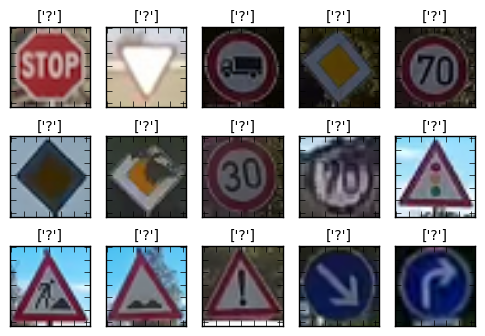

In [429]:
#import External images
import os
import numpy as np
import matplotlib.image as mpimg


own_images=np.array([np.array(mpimg.imread("own_data/"+file)) for file in os.listdir("own_data")])
correct_labels=[14,13,16,12,4,12,12,1,4,26,25,22,18,38,33]
unknown_lbl=[]
for i in range(len(own_images)):
    unknown_lbl.append('?')
#print(own_images[0])
show_extra(len(own_images), own_images, unknown_lbl)
extra_proc=[]
for i in range(len(own_images)):
    extra_proc.append(own_images[i] - 0.5*np.max(own_images[i]))
    extra_proc[i]*=255
#show_extra(len(extra_proc), extra_proc, unknown_lbl)


Now testing external images...
Test Accuracy = 0.86667
Test Loss = 0.98185


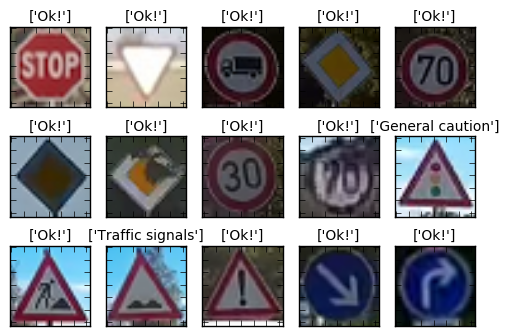

In [432]:
#extra_prep.shape()

with tf.Session() as sess:
    print("Now testing external images...")
    saver.restore(sess, save_file)
    
    inferences= sess.run(inference_op, feed_dict={x: extra_proc})
    test_acc=evaluation(extra_proc, correct_labels)
    test_loss=loss_eval(extra_proc, correct_labels)
    print("Test Accuracy = {:.5f}".format(test_acc))
    print("Test Loss = {:.5f}".format(test_loss))
    
    evaluated=[]
    """
    for i in inferences:
        evaluated.append(labels_name[i])
    print(evaluated)
    """
    for i in range(len(inferences)):
        if inferences[i]==correct_labels[i]:
            evaluated.append("Ok!")
        else:
            evaluated.append(labels_name[inferences[i]])
    
    #show_extra(len(own_images), own_images, inferences)
    show_extra(len(own_images), own_images, evaluated)
    


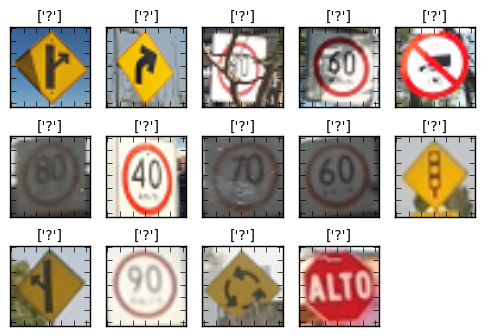

In [431]:
#Test with mexican signs

mex_images=np.array([np.array(mpimg.imread("mexican/"+file)) for file in os.listdir("mexican")])
correct_labels_mx=[36,33,3,3,16, 5,99,4,3,26, 37,99,40,14]
unknown_lbl=[]
for i in range(len(own_images)):
    unknown_lbl.append('?')
#print(own_images[0])
show_extra(len(mex_images), mex_images, unknown_lbl)

mex_proc=[]
for i in range(len(mex_images)):
    mex_proc.append(mex_images[i] - 0.5*np.max(mex_images[i]))
    mex_proc[i]*=255

#show_extra(len(mex_proc), mex_proc, unknown_lbl)

Now testing mexican images...
['Stop', 'Speed limit (30km/h)', 'Yield', 'Speed limit (20km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'Double curve', 'Vehicles over 3.5 metric tons prohibited', 'Speed limit (80km/h)', 'Stop', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Stop', 'Speed limit (50km/h)']


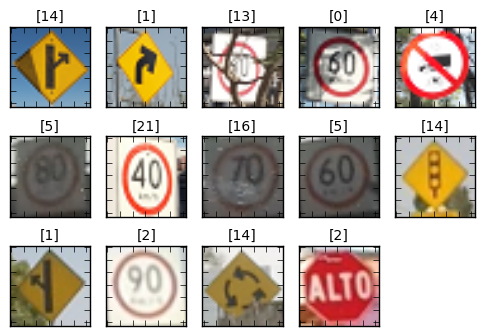

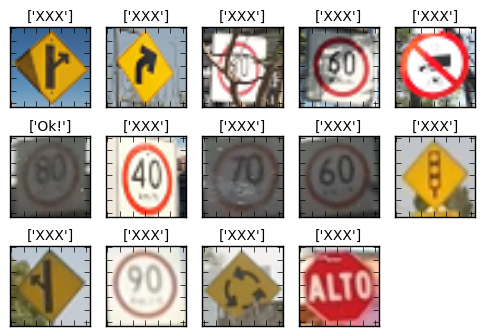

In [444]:
with tf.Session() as sess:
    print("Now testing mexican images...")
    saver.restore(sess, save_file)
    
    inferences_mx= sess.run(inference_op, feed_dict={x: mex_proc})
    #test_acc=evaluation(mex_proc, correct_labels_mx)
    #test_loss=loss_eval(mex_proc, correct_labels_mx)
    #print("Test Accuracy = {:.5f}".format(test_acc))
    #print("Test Loss = {:.5f}".format(test_loss))
    
    evaluated_mx=[]
    for i in inferences_mx:
        evaluated_mx.append(labels_name[i])
    
    print(evaluated_mx)
    evaluated_mx=[]
    for i in range(len(inferences_mx)):
        if inferences_mx[i]==correct_labels_mx[i]:
            evaluated_mx.append("Ok!")
        else:
            evaluated_mx.append("XXX")
    
    show_extra(len(mex_images), mex_images, inferences_mx)
    show_extra(len(mex_images), mex_images, evaluated_mx)
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I thought the model will have trouble with a couple of signals covered
with leaves, however they seem to do ok [Priority Road, 70km/h].
A surprise came when a "bumpy road" sign was recognised as "Traffic signals"
and "Traffic signals" wasn´t reognized.

Also, just for the fun of it, run the model on some images around my home,
unsurprisingly, none of them was correctly labeled, a couple things come
to mind for future experimentation:
- Grayscale might help avoid to learn the sign colors
- Deformation on the augmented data may improve accuracy
- Covering up part of the signs may also help

Now testing external images...
External Accuracy = 0.86667
External Loss = 0.98185


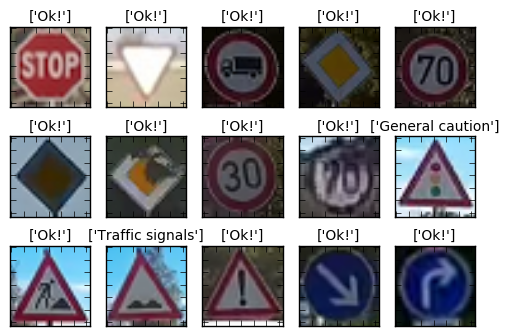

In [453]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    print("Now testing external images...")
    saver.restore(sess, save_file)
    
    inferences= sess.run(inference_op, feed_dict={x: extra_proc})
    test_acc=evaluation(extra_proc, correct_labels)
    test_loss=loss_eval(extra_proc, correct_labels)
    print("External Accuracy = {:.5f}".format(test_acc))
    print("External Loss = {:.5f}".format(test_loss))
    
    evaluated=[]
    """
    for i in inferences:
        evaluated.append(labels_name[i])
    print(evaluated)
    """
    for i in range(len(inferences)):
        if inferences[i]==correct_labels[i]:
            evaluated.append("Ok!")
        else:
            evaluated.append(labels_name[inferences[i]])
    
    #show_extra(len(own_images), own_images, inferences)
    show_extra(len(own_images), own_images, evaluated)
    


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Accuracy seems ok [86%] on external images, I expected it to be lower than the [97%] of the validation set, but not for this much, so it seems it still overfitting, however, its not that far away from the Test set accuracy [87%].
A thing that could have improved this is the original split, I didn´t check on what was in the Test set, a wise chose will be to mix all the images, and from there, take the validation and test sets.

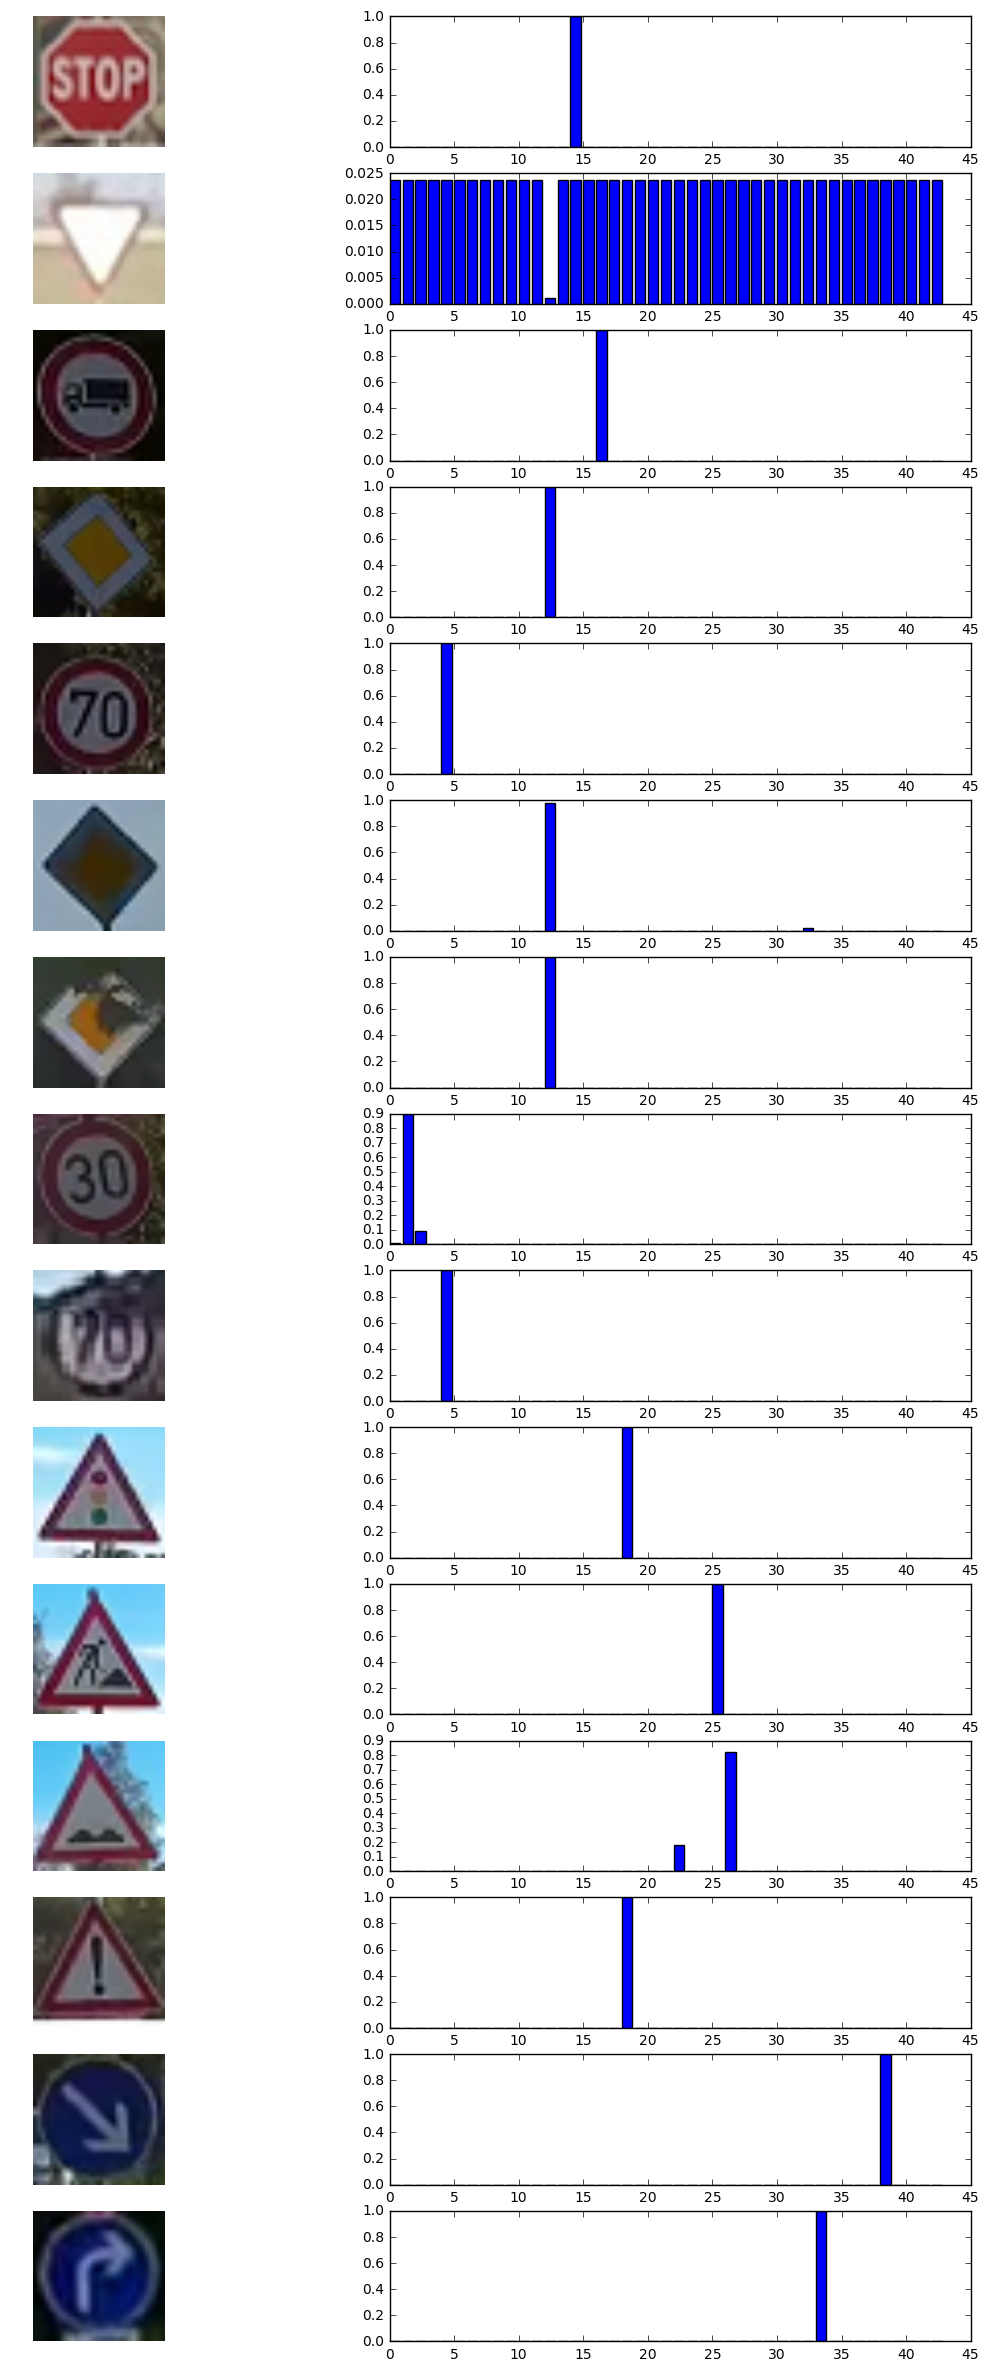

In [479]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


original_5, proce_5 = own_images[0:15], extra_proc[0:15]

top_k_operation = tf.nn.top_k(tf.nn.softmax(logits_1), 43)

with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_k_output = sess.run(top_k_operation, feed_dict={x: proce_5})
    #print (top_k_output)
    fig, axs = plt.subplots(15, 2, figsize=(15, 30))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i, top_k_indices, top_k_values, image in zip(range(0, 30, 2), top_k_output.indices, top_k_output.values, original_5):
        axs[i].axis('off')
        axs[i].imshow(image)

        axs[i+1].bar(top_k_indices, top_k_values)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The first thing to notice is that for the "Yield" image the model is really
uncertain of it´s classification (looks almost like a normal distribution)
The second thing to notice is that for any other sign, the model seems really
confident, showing no less than 80% certainity of a given class
As for the misclassifications:

- "Traffic lights"
  - Predicted as "General Caution" [0.99]
  - "Traffic signals" as second guess (and actual class) [1.07e^-4]
  - "Children crossing" is third guess [5.43e^-8
 
- "Bumpy road"
  - Predicted as "Traffic signals" [.82]
  - "Bumpy road" as second guess (and actual class) [.18]
  - "Children crossing" [2.86e^-7]


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [480]:
print(top_k_output.values[1][0:6], top_k_output.indices[1][0:6])
print(top_k_output.values[9][0:3], top_k_output.indices[9][0:3])
print(top_k_output.values[11][0:3], top_k_output.indices[11][0:3])

[ 0.02378183  0.02378183  0.02378183  0.02378183  0.02378183  0.02378183] [0 1 2 3 4 5]
[  9.99893069e-01   1.06861764e-04   5.42567697e-08] [18 26 28]
[  8.20203006e-01   1.79796711e-01   2.85953803e-07] [26 22 28]
